# Code for reading in Five Years of Migration Data by Country

### Kate Beck and Teddy Forscher <br> CP290

In [2]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import string
import csv
from os.path import join

%matplotlib inline

#### Reading in the Data

In [2]:
# starting point, loading the .csv file as .txt file to aid in conversion to a graph
lines = np.loadtxt("migration.csv",dtype='str',delimiter=',')
lines[1]

array(['Aruba', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '14',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '13', '0',
       '0', '0', '42', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '4', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '87', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [3]:
len(lines)
# the first row of the text file is all the destinations
destinations=lines[0]

In [4]:
# This works to create both a directed and undirected graph of our network
g = nx.DiGraph()
G = nx.Graph()

for i in range(1,len(lines)-1): 
    count=0;
    data=lines[i];
    node=data[0];
    for col in data[1:]:
#         print col
        count=count+1;
        d=destinations[count];
#         print node, d, col
        wij=int(col)
# AHA THIS FIXED IT
        if wij >0:
            print wij
            g.add_edge(node,d,weight=wij)
            G.add_edge(node,d,weight=wij)
        #print node,' ',d,' ',col
        #print col

1
1
1
14
1
13
42
1
4
3
1
87
1
1
101
2094
8885
2175
35
1068
136
280
133
1
26
12270
1247
3
36
1
3
326
32852
4478
1
2
33
34
3
1379
1091
13444
9
62
316
44
266595
18
3
810
1782
4
567
12
7
104
37
10
17
63
2
1
1
145
3
8894
4701
896
3
210
62
5
550
3
5731
796
63
4
6388
566
20
4119
315
13781
192
5
13
12
432
329
38
13
117
5495
41
10
146
46
196
4402
8912
21
4
48150
4
6986
60
75
40
194
20
4
240
7842
209
104
11623
3
47
15701
507
7
57
2
190
8
463
896
9
1381
126
35392
281
12104
370
253
3
437
238
25166
2817
60
17
10
19
185
3
789
389
1166
6181
2
8
431
235
2
13960
24049
173
564
4924
125
18
1101
49
11196
10
209
6
98
24
55
3653
995
17
5
1210
466
16
44
51
2
13192
2466
2
1
31
17
6996
3546
20
10015
23
1
17
2226
35
143
4
111
2422
5863
805
602
103
7313
78
136370
16
498
3448
3696
2
1
269
763
176
2
7
22
55
254
651
8
689
3
2
137
18147
91127
3
8
678
921
1
32
2
3
1
108
321
82
7
8
3860
8
14
17
2
56
4
12
14
1097
998
611
665
36
260
1820
1
1392
22126
2
1
14
3107
1325
5
3
18
30
45
9
16
456
308
1658
10
130
1
1
12
820
40
3

60
695
2
1
2
3
1
12
18
3
1912
3058
329
1
20
12
1077
1
90
8
335
2
863
125524
13
4
5664
13
105
4
26
13
1545
57079
8
8511
3664
1
1
43
48
133
28
2
2
1
7
203
4
3
2
132
381
63
9
207
1007
1
41
94
1
7
20
6
2
114
7
1272
2
12334
3
1
1
4012
1
1
5
2
22
11
2
1
21
1
27
14
10807
7
2
1
19
78
4609
75
4
1
252
20
3245
26
9217
2769
3
2498
54725
143
1004
456
16
2
118
58
72
6
4
135
806
7383
44794
1239
296
146
238
3
1883
358
29
65
4
1129
6069
35827
3023
47
589
1077
316
7
87
52317
16
1443
11
57686
35
3
1434
1088
26
10
51
1
107
40
2458
74
6819
353
14362
148544
61
50
643
80
27
74
217
14
291
6
19
401
21594
360
3
1387
8
2
188
14
24
288
254
1
913
4012
9
5734
3045
2814
109
304
11064
9
4536
29
946
1682
5902
1509
294
4
12
38
5
433
2935
6
174
2280
272
3723
82
36
3215
14
413
4735
61
842
7
547
6
9
433
23
108
8011
14
80
2
1
1
2
1
6
56
3
1
10
2
1
1
7
1
5
6
1
7
15
1212
7
1
1
1
9
10
16
17
1
1
23
2
2
14
8
2
1
4
1
8
7
3
3
1
2
7405
5
2
121
15
93
15
1
1330
597
9
10
2
5
42
233
520
153
2
15
71
1862
1
1
6
806
37
1
5
5
745
17
13041

1
2
1
3701
2
4
558
2
44
2148
287
389
7400
1
45
330
2
258
3
11246
4630
3
1
6
18
1
19
162
23272
961
1
461
33
368
1
265763
672
172019
10
3132
5
440
79
42
63
45918
97628
22
1
6
2
47
7
5
21
27
150
1
2
113
15923
1354
26
4
215
503
639
5
14
291
5
1
2210
1
24
5
2472
36
1263
179
13310
50
302
4
55
107
260
128
1090
970
1
1145
437
5
7
1
3
157
6289
1870
128
10
9
3
7150
129
47
2207
139
370
101
13
9
50883
3442
201
4
205
1
4
4
126
279
11
245
1
6706
19627
47409
5
62
116
273
1
366
1
26935
2788
6
7
13
1
8
5
2
2
13016
3
1
48
9
1
2
1
19
1713
1286
32
8
4
232
1
11
31
5
14
1
768
236
1
1
28
2
3
1
63
10
189
48
2
7
66
59
14
1
212
993
1
1
81
7
8
7
116
9
2
30
880
1
7
48
118
82
1
2
1
1
1
8
1
1
6
1
9
1
39
2
6
1
52
65
35
181
82
2
10
15
2
6
463
4
13
51
1
201
140
1
3
2
1
64
58
9
4
1064
2
108
1
1
4
11
1725
532
12
4
441
13
61
1
15
7
455
4806
900
2
3
20696
2513
1
236
1
1
8
1274
3
309
18
35
393
2662
464
353
8
2198
16
18807
3
365
4482
361
1
26
468
3572
41
1
146
3
132
260
159
52
1634
3842
1
3
247
1102
9
1
1
2
4
25
26
42
6
5
2

7869
2
2120
3
62
3
236
161
336
162
4
1
997
15
20
240
1
1052
5867
1
1
3
1
49
119
17322
2
337
3
4
1
68083
1
18
147
2
361
3
9
54
80
1158
157
318
1
1912
3
4
362
198
1
33
20
2
7
65
753
4648
39
81
13
60
678
173
29
377
56
326
5
43
5
1029
2
29
1164
67961
602
21
19
164
209
956
1
1
3
1
158
238
16
1
33
4
55
2
103
191828
3
25
7
251
2
662
175
2
14147
521
4263
21
1
14
57
404
60
209
725
1
10
51
107
7
6
1
2
29
393
1068
20
5
9
6
369
65
18
105
68
9
36
3
1655
3
912
734
7192
64
2
67
210
1
1
1
42
95
4
1
45
1
62
44
37122
1
19
7
135
516
1
1
4727
1
283
9
1
23
1379
5
23968
25
40
9696
3
164
1
2
123
72
3
449
223
6
4
342
3
5
13
17
47
210
36
1
18
9
22
341
19
3
126
508
13
1
1
604
2
14
37
23
25
1
4
30
328
29
377
2
231
215
1
4
34
1
53
2
34
1
2
1
19
6
3
3
8
1026
8
455
42
257
81
1
4
19
86
13
19
3599
1
331
5
20
838
518
6
1
1
4
3
74
36
35
1661
14
575
1
121
1918
1
1
2
5
35
1
4
2
7
4
1
4911
1
9
1525
7
2
113
10
2
86
518
2587
54
11
3
3
48
16
1
29
35
8
143
16000
2
69
187
4
7
71
228
165
1
2
2
32
63
20
16
2
4
2
2
1
52
1
168
345

#### Doing a few data checks

In [5]:
# I am looking to make sure that with Aruba as the origin, it is only connected to destination nodes with non-zero 
# values. This is not true, Checking against the .csv file. 
print len(nx.edges(G, nbunch='Aruba' )), len(nx.edges(g, nbunch='Aruba'))

42 15


In [6]:
## Ok, so everything is "connected", but the weights are accurately showing flows.
nx.get_edge_attributes(G, 'weight')

{('Indonesia', 'Mexico'): 141,
 ('Iran', 'Denmark'): 5112,
 ('China', 'Colombia'): 740,
 ('New Zealand', 'Armenia'): 3,
 ('Czech Republic', 'Switzerland'): 613,
 ('Tajikistan', 'Moldova'): 956,
 ('Austria', 'Myanmar'): 14,
 ('Ivory Coast', 'Russia'): 166,
 ('Czech Republic', 'Solomon Islands'): 1,
 ('Turkmenistan', 'Tanzania'): 1,
 ('Indonesia', 'Ecuador'): 113,
 ('Denmark', 'Germany'): 1981,
 ('South Korea', 'Brazil'): 4832,
 ('Solomon Islands', 'Iceland'): 1,
 ('Slovakia', 'Moldova'): 62,
 ('Romania', 'Honduras'): 1,
 ('Vietnam', 'Maldives'): 2,
 ('Canada', 'Ivory Coast'): 4673,
 ('Cyprus', 'Honduras'): 1,
 ('Cape Verde', 'Belgium'): 11,
 ('Burkina Faso', 'Germany'): 996,
 ('Ukraine', 'Sweden'): 1191,
 ('Malaysia', 'Kyrgyzstan'): 1,
 ('Indonesia', 'French Polynesia'): 11,
 ('Pakistan', 'Poland'): 255,
 ('Argentina', 'Mauritius'): 4,
 ('Burkina Faso', 'France'): 7484,
 ('Jordan', 'Costa Rica'): 1,
 ('Japan', 'Russia'): 502,
 ('Venezuela', 'United Kingdom'): 88,
 ('Libya', 'Cyprus'): 8

In [ ]:
# this will do the same thing as above showing the real weights
# for (u,v,d) in g.edges(data='weight'):
#     print u, v, d

In [7]:
# Taking a subset of the directed graph using only the strongly_connected_component_subgraphs
node_num_directed=[]
for node in g:
#     print node
    x = max(nx.strongly_connected_component_subgraphs(g), key=len)
    node_num_directed.append(g.number_of_nodes())

In [8]:
# let's also make a 'y' to take connected components from the undirected graph
node_num_undirected=[]
for node in g:
#     print node
    y = max(nx.connected_component_subgraphs(G), key=len)
    node_num_undirected.append(G.number_of_nodes())

In [9]:
# ok let's see if x and g are the same thing, the answer is no, y and G are
print nx.is_isomorphic(x, g), nx.could_be_isomorphic(x, g)
print nx.is_isomorphic(y, G), nx.could_be_isomorphic(y, G)

False False
True True


In [10]:
# another way of seeing what's going on; so x has just a few fewer edges than g
print nx.edges(x) == nx.edges(g)
print len(nx.edges(x)), len(nx.edges(g))
print len(nx.edges(y)), len(nx.edges(G))

False
11153 11788
9790 9790


In [22]:
# we run the clustering coefficient on the undirected network, but shortest path and degree on the directed network
print "average clustering is: ", (nx.average_clustering(G))
# this shortest path calculation isn't working
print "average shortest directed path length is: ", (nx.average_shortest_path_length(g))
print "average shortest undirected path length is: ",(nx.average_shortest_path_length(G))
# just as a reminder, degree is the number of edges adjacent to a node
# I believe we do need the weight='weight' for the degree calculation, but I'm not sure
# kg = np.mean(dict(nx.degree(g)).values())
kG = np.mean(dict(nx.degree(G)).values())
#path = nx.average_shortest_path_length(G)
#k = np.mean(dict(nx.degree(G)).values())
print "<k> directed is: " , kg
print "<k> undirected is: ", kG

average clustering is:  0.759793314252
average shortest directed path length is:  1.70100449379
average shortest undirected path length is:  1.48242135871
<k> directed is:  120.902564103
<k> undirected is:  100.41025641


In [ ]:
# doing the same calculations but for x and y
print(nx.average_clustering(y, weight='weight'))
print(nx.average_shortest_path_length(x, weight='weight'))
kx = np.mean(dict(nx.degree(x, weight = 'weight')).values())
print kx

In [ ]:
# another way of checking for paths in the network, since the short command for shortest path is not working
# this code will take a long time to run, FYI
# print [a for a in nx.all_shortest_paths(g, source='Aruba', target='Canada',weight = 'weight')]

In [19]:
# an alternative way to calculate shortest path; which gives a slightly different answer
Ptmax =-1;
sumpt=0;
t=0;
for node in g.nodes():
    paths = nx.shortest_path(g,node, weight='weight').values()
    #print node, "has ",len(paths)-1,"paths"
    for x in range(0,len(paths)):
        pt = len(paths[x])-1
        if pt>0:
            #print paths[x], "length ", pt
            t=t+1
            sumpt = sumpt + pt
            if pt>Ptmax:
                Ptmax=pt
                
# this will give us the average shortest path length of 1.31, even though a few cells up it returns 0
print "number of shortest paths: ",t,", sum of paths: ",sumpt, ", average shortest path:",float(sumpt)/t

number of shortest paths:  35913 , sum of paths:  98512 , average shortest path: 2.74307353883


In [ ]:
# if we want to just look at edgeweights
edgeweights = []
for (u,v,d) in g.edges(data='weight'):
    edgeweights.append(d)

print "min= ",min(edgeweights),"and max= ",max(edgeweights)


In [ ]:
type(edgeweights)

In [ ]:
#checking min and max degrees of in nodes
min_w_deg=min(dict(g.in_degree(weight='weight')).values())

max_w_deg=max(dict(g.in_degree(weight='weight')).values())
print "min= ",min_w_deg,"and max= ",max_w_deg
in_degrees=g.in_degree(weight='weight')
    # sort nodes by degree
from operator import itemgetter
in_nodes=sorted(g.in_degree(weight='weight'),key=itemgetter(1))

#### Comparisons to other graphs 

In [4]:
# From above, we have:
# Number of nodes for G or g: 196
# Clustering coefficient for G: 0.759793314252
# Average shortest path for G: 1.48242135871
# <k> for G: 100.41025641

# this means that for a random graph, our p would simply be p = <k>/N
p = 100.41025641/196
p
k = 100.41025641

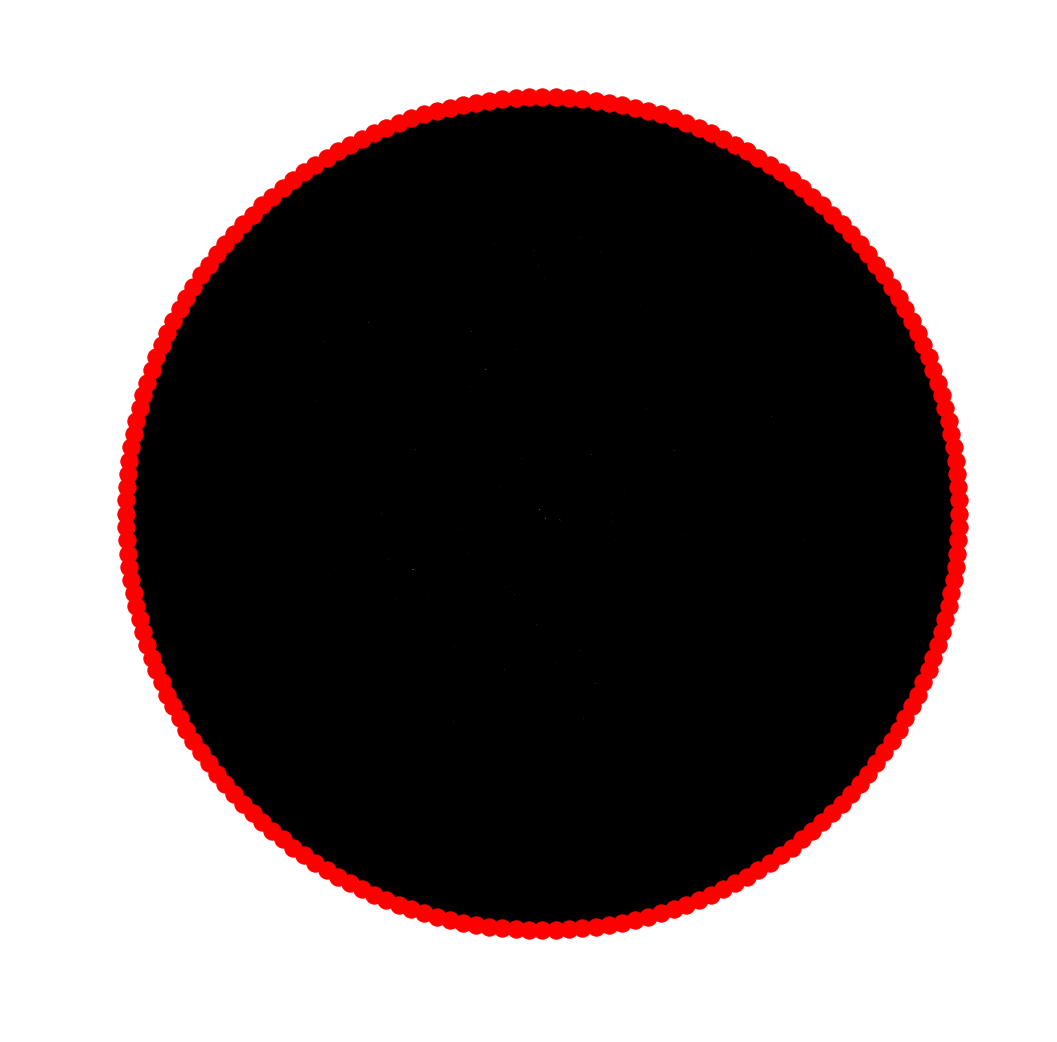

In [5]:
RG = nx.erdos_renyi_graph(196,p) #based off of the paper, it looks like completely random is p = 1
#RG = nx.fast_gnp_random_graph(196,.5)
plt.figure(figsize=(14,14))
nx.draw_circular(RG, nodesize = .01)



In [7]:
print "average clustering is: ", (nx.average_clustering(RG))
# this shortest path calculation isn't working
print "average shortest directed path length is: ", (nx.average_shortest_path_length(RG))
print "average shortest undirected path length is: ",(nx.average_shortest_path_length(RG))
kRG = np.mean(dict(nx.degree(RG)).values())
print "<k> is: " , kRG

average clustering is:  0.511101678663
average shortest directed path length is:  1.48995290424
average shortest undirected path length is:  1.48995290424
<k> is:  99.4591836735


######looks like it's not a random graph

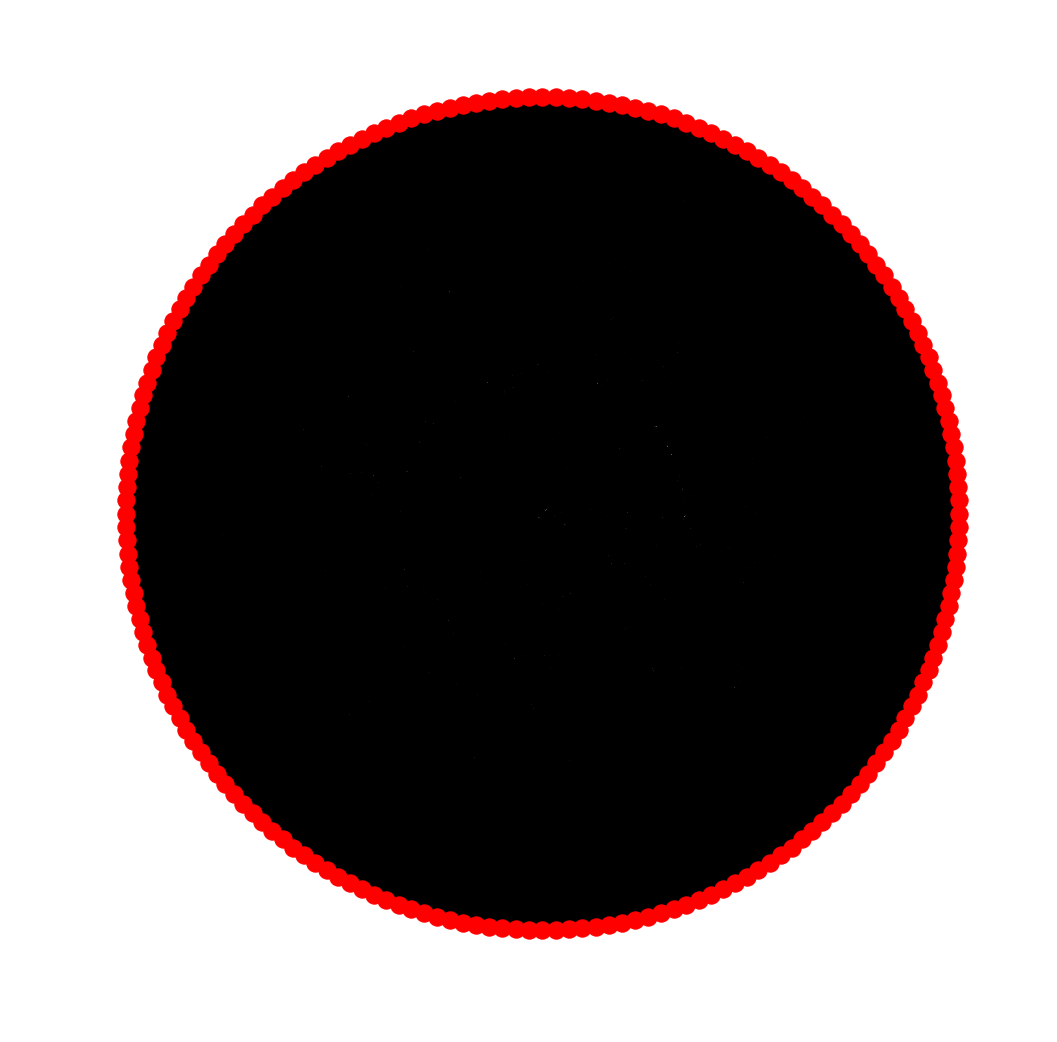

In [30]:
# Ok let's try a small world graph now
WS = nx.watts_strogatz_graph(196,int(k),.5)
plt.figure(figsize=(14,14))
nx.draw_circular(RG, nodesize = .01)

######nor is it small world

#### Geocoding and Plotting the Migration data

In [31]:
#from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("USA")
print location.latitude,' ',location.longitude


### Here we use it to create the dictionary with coordinates
pos = {}
for n in g.nodes():
    print n
    location = geolocator.geocode(n,timeout=30)
    pos[n] = (location.longitude,location.latitude)
    #print location.latitude," ",location.longitude


39.7837304   -100.4458825
Canada
East Timor
Sao Tome and Principe
Turkmenistan
Lithuania
Cambodia
Ethiopia
Aruba
Sri Lanka
Swaziland
Palestine
Argentina
Bolivia
Cameroon
Burkina Faso
Bahrain
Saudi Arabia
Micronesia
Japan
Channel Islands
Cape Verde
Slovenia
Guatemala
Bosnia and Herzegovina
Guinea
Jordan
Spain
Liberia
Netherlands
Pakistan
Oman
Tanzania
Martinique
Ivory Coast
Gabon
New Zealand
Yemen
Jamaica
Albania
Samoa
United Arab Emirates
Guam
India
Azerbaijan
Madagascar
Lesotho
Saint Vincent and the Grenadines
Kenya
South Korea
Macao
Turkey
Afghanistan
Czech Republic
Eritrea
Solomon Islands
Saint Lucia
Mongolia
France
Rwanda
Slovakia
Somalia
Peru
Laos
Republic of Congo
Norway
Malawi
Benin
Western Sahara
Cuba
Montenegro
Togo
Virgin Islands
China
Armenia
Dominican Republic
Ukraine
Ghana
Tonga
Indonesia
Libya
Finland
Central African Republic
United States
Tajikistan
Sweden
Belarus
Mali
Russia
Bulgaria
Mauritius
Romania
Angola
Portugal
South Africa
Cyprus
Malaysia
Austria
Vietnam
Mozambiq

In [33]:
# This will give us in migration
import matplotlib.colors as colors
plt.figure(3)

degree_in=dict(g.in_degree(weight='weight')).values()

ns=[] #saves node size
nc=[] #saves node color
n_label = {}
#for n in g.nodes_iter():
 #   n_label[n] = n

for node in g.nodes():   
    dn=g.in_degree(node,'weight')
    #print node 
    if(dn>=500000):
        n_label[node] = node
        ns.append(40000)
        nc.append("red")
    if(dn>=100000 and dn<500000):
        ns.append(20000)
        nc.append("blue")
        n_label[node] = node
    if(dn<100000):
        ns.append(10000)  
        nc.append("grey")  
   

In [34]:
#pos=nx.spring_layout(g)
plt.figure(figsize=(200,150))
nx.draw_networkx_nodes(g, pos=pos, node_size=ns, 
             node_color = nc)
nx.draw_networkx_labels(g,pos,n_label,font_size=90,font_color='k')
plt.title('In Migration',fontsize=150)
plt.legend(loc="upper left")
plt.axis('off')
plt.savefig('in_migration', format='pdf')

In [40]:
# This will give us out migration
import matplotlib.colors as colors
plt.figure()

degree_out=dict(g.out_degree(weight='weight')).values()

outns=[] #saves node size
outnc=[] #saves node color
outn_label = {}
#for n in g.nodes_iter():
 #   n_label[n] = n

for node in g.nodes():   
    dno=g.out_degree(node,'weight')
    #print node 
    if(dno>=500000):
        outn_label[node] = node
        outns.append(40000)
        outnc.append("red")
    if(dno>=100000 and dn<500000):
        outns.append(20000)
        outnc.append("blue")
        outn_label[node] = node
    if(dno<100000):
        outns.append(10000)  
        outnc.append("grey")  
   

In [41]:
#pos=nx.spring_layout(g)
plt.figure(figsize=(200,150))
nx.draw_networkx_nodes(g, pos=pos, node_size=outns, 
             node_color = outnc)
nx.draw_networkx_labels(g,pos,outn_label,font_size=90,font_color='k')
plt.title('Out Migration',fontsize=150)
plt.axis('off')
plt.savefig('out_migration', format='pdf')

#### Code that is not needed

In [ ]:
pathlength=[]
clustering=[]
k = []
node_num=[]
names=[]
fnames_sorted=[]
#path2='migration.csv'

for i in I:
    #print fnames[i]
#     g=nx.read_pajek(fnames[i])

    fn=fnames[i]
    fname = str.split(fn[len(lines):],'.')  ### Modify accordingly or comment this and next line
    names.append(fname[0])
    fnames_sorted.append(fnames[i])
    G = max(nx.strongly_connected_component_subgraphs(g), key=len)
    node_num.append(G.number_of_nodes())
    H=fromMulti_to_Single(G)
    clustering.append(nx.average_clustering(H))
    pathlength.append(nx.average_shortest_path_length(H))
    k.append(np.mean(dict(nx.degree(H)).values()))